#Introduction

* Trong ngành viễn thông, khách hàng có thể lựa chọn từ nhiều nhà cung cấp dịch vụ khác nhau và chủ động chuyển đổi từ nhà cung cấp dịch vụ này sang nhà cung cấp khác một cách dễ dàng và không có nhiều sự ràng buộc.
* Việc giữ chân từng khách hàng cá nhân rất khó khăn vì hầu hết các công ty đều có một lượng khách hàng lớn và không thể dành nhiều thời gian cho từng KH một được
* Tuy nhiên, nếu một công ty có thể dự báo những khách hàng nào có khả năng rời bỏ sớm, thì công ty đó có thể tập trung vào tập KH này từ đấy chăm sóc tốt hơn hoặc tung ra nhiều chương trình ưu đãi tốt hơn

=> Mục đích giữ chân KH, tăng độ phủ sóng, thu hút thêm sự trung thành của KH.

* Tỷ lệ Customer Churn là một chỉ số quan trọng vì việc giữ chân khách hàng hiện nay ít tốn kém hơn nhiều so với việc tìm kiếm một KH mới
* Để giảm bớt tình trạng rời bỏ của khách hàng, các công ty viễn thông cần dự đoán những khách hàng nào có nguy cơ rời bỏ cao
* Càng có nhiều khách hàng trong mạng lưới của mình, chi phí ban đầu càng thấp và lợi nhuận càng lớn. Do đó, Customer Churn là một yếu tố vô cùng quan trọng quyết định đến sự thành công của một công ty, một doanh nghiệp.


##Dataset Information

* Bộ dữ liệu Customer Churn một bộ dữ liệu trên [Kaggle](https://https://www.kaggle.com/blastchar/telco-customer-churn) với 7043 quan sát và 21 biến
* Đây là bài toán phân loại trong học có giám sát. Mục đích để dự báo tỷ lệ rời bỏ của khách hàng trong ngành viễn thông. Từ đấy có thể phát triển các chương trình giữ chân khách hàng một cách tập trung hơn

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks')
!ls dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
creditcard.csv	    realestate.csv  weatherAUS_2.csv
Customer-Churn.csv  test.csv	    weatherAUS.csv
data		    train.csv	    weatherdata.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##Understanding the data

In [ ]:
df = pd.read_csv("dataset/Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df = df.drop('customerID', axis =1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'].dtypes

dtype('O')

Ở đây `TotalCharges` là kiểu `object` nên chúng ta cần biến đổi nó thành định dạng numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

errors = (`raise`, `coerce`,`ignore`), mặc định là `raise`

* Nếu dùng `coerce`, gặp những trường hợp ngoại lệ sẽ đổi thành NaN.
* Nếu dùng `ignore`, gặp những trường hợp ngoại lệ sẽ trả về giá trị input

In [ ]:
# Checking for null values 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_pipeline = df

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
df['Churn'].value_counts()/len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

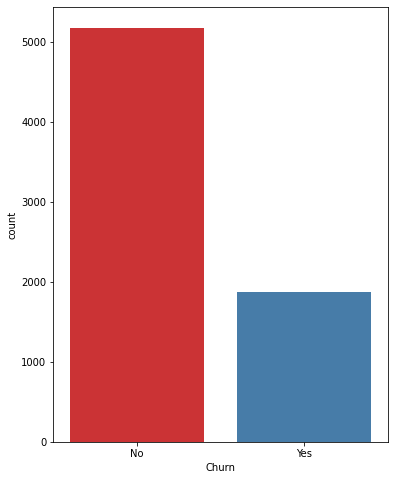

In [ ]:
f,ax = plt.subplots(figsize=(6,8))
ax = sns.countplot(x='Churn', data=df, palette='Set1')
plt.show()

##Visualization

In [ ]:
g = px.histogram(df, x="Churn", color="SeniorCitizen")
g.update_layout(width=750, height=550)
g.show()

In [ ]:
g = px.histogram(df, x="gender", color="Churn")
g.update_layout(width=750, height=550)
g.show()

In [ ]:
g = px.pie(df, values='TotalCharges', names='Churn', hole=0.5)
g.show()

In [ ]:
labels = df['MultipleLines'].unique()
values = df['MultipleLines'].value_counts()

g = go.Figure(data=[go.Pie(labels=labels, values=values)])
g.show()

In [ ]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()


g = go.Figure(data=[go.Pie(labels=labels, values=values)])
g.show()

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()


g = go.Figure(data=[go.Pie(labels=labels, values=values)])
g.show()

In [ ]:
labels = df['Contract'].unique()
values = df['Contract'].value_counts()


g = go.Figure(data=[go.Pie(labels=labels, values=values)])
g.show()

##Preprocessing Data

In [ ]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("-----------------------------------------------")

gender : ['Female' 'Male']
-----------------------------------------------
Partner : ['Yes' 'No']
-----------------------------------------------
Dependents : ['No' 'Yes']
-----------------------------------------------
PhoneService : ['No' 'Yes']
-----------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
-----------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
-----------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
-----------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
-----------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
-----------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
-----------------------------------------------
StreamingTV : ['No' 'Yes' 'No internet service']
-----------------------------------------------
StreamingMovies : ['N

In [ ]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [ ]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("-----------------------------------------------")

gender : ['Female' 'Male']
-----------------------------------------------
Partner : ['Yes' 'No']
-----------------------------------------------
Dependents : ['No' 'Yes']
-----------------------------------------------
PhoneService : ['No' 'Yes']
-----------------------------------------------
MultipleLines : ['No' 'Yes']
-----------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
-----------------------------------------------
OnlineSecurity : ['No' 'Yes']
-----------------------------------------------
OnlineBackup : ['Yes' 'No']
-----------------------------------------------
DeviceProtection : ['No' 'Yes']
-----------------------------------------------
TechSupport : ['No' 'Yes']
-----------------------------------------------
StreamingTV : ['No' 'Yes']
-----------------------------------------------
StreamingMovies : ['No' 'Yes']
-----------------------------------------------
Contract : ['Month-to-month' 'One year' 'Two year']
-------------------

In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df['gender'].unique()

array([1, 0])

In [ ]:
ojb_2 = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in ojb_2:
    df[i].replace({"No":0, "Yes":1}, inplace=True)

Còn ba features không có sự tương quan gì thì tiến hành get_dummies

In [ ]:
obj_3 = ['InternetService' ,'Contract' ,'PaymentMethod']
df = pd.get_dummies(data=df, columns= obj_3)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


##Spliting the data

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((5634, 26), (1409, 26))

##Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

##SMOTE
* Bước cuối cùng trước khi xây dựng mô hình là xử lý sự mất cân bằng của dữ liệu. Chúng ta sẽ chia nhỏ tập dữ liệu và sau đó áp dụng kỹ thuật SMOTE.


* SMOTE là viết tắt của Synthetic Minority Oversampling Technique. Đây là một kỹ thuật thống kê để tăng số lượng quan sát trong dữ liệu một cách cân bằng. Mô-đun này hoạt động bằng cách tạo ra các quan sát mới từ các lớp ít hơn (lớp thiểu số)
* Đối với các kỹ thuật over-sampling, SMOTE được coi là một trong những thuật toán lấy mẫu dữ liệu phổ biến và có ảnh hưởng nhất trong ML và khai thác dữ liệu

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smt))

Original dataset shape Counter({0: 4133, 1: 1501})
Resampled dataset shape Counter({0: 4133, 1: 4133})


##Building Model

###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_smt,y_train_smt)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[763 278]
 [ 81 287]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1041
           1       0.51      0.78      0.62       368

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

The Accuracy for Logistic Regression is 0.7452093683463449


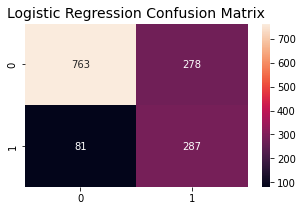

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_smt,y_train_smt)
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
DCT = accuracy_score(y_test, y_pred)
print("The Accuracy for DecisionTree is {}".format(DCT))

[[753 288]
 [ 92 276]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1041
           1       0.49      0.75      0.59       368

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409

The Accuracy for DecisionTree is 0.730305180979418


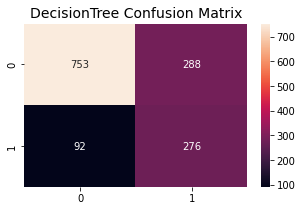

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("DecisionTree Confusion Matrix",fontsize=14)
plt.show()

###Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(
  DecisionTreeClassifier(), 
  n_estimators=50,
  max_samples=100, 
  bootstrap=True, #Lấy mẫu tái lặp, không bao gồm những TH out-of-bags
  n_jobs=-1)

bagging.fit(X_train_smt,y_train_smt)
y_pred = bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
BAGGING = accuracy_score(y_test,y_pred)
print("The Accuracy Score for Bagging Classifier is {}".format(BAGGING))


[[785 256]
 [111 257]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1041
           1       0.50      0.70      0.58       368

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409

The Accuracy Score for Suppport Vector Classifier is 0.7395315826827538


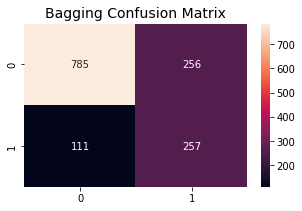

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("Bagging Confusion Matrix",fontsize=14)
plt.show()

###SVM

In [ ]:
# RBF kernel
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC

rbf_svc = SVC(C = 1.0, kernel = 'rbf', gamma='auto')
rbf_svc.fit(X_train_smt,y_train_smt)
y_pred = rbf_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RBF_SVC = accuracy_score(y_test,y_pred)
print("The Accuracy Score for SVM is {}".format(RBF_SVC))

[[753 288]
 [ 84 284]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1041
           1       0.50      0.77      0.60       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.74      0.75      1409

The Accuracy Score for Suppport Vector Classifier is 0.7359829666430092


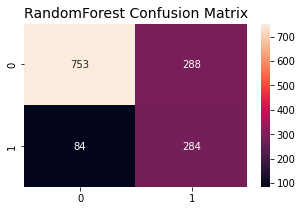

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()

###RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_smt,y_train_smt)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RDF = accuracy_score(y_test, y_pred)
print("The Accuracy for RandomForest is {}".format(RDF))

[[868 173]
 [149 219]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.56      0.60      0.58       368

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.77      0.77      1409

The Accuracy for RandomForest is 0.7714691270404542


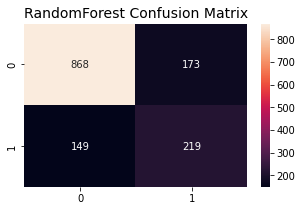

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()

###XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth= 4, n_estimators= 100, random_state=42)
xgb.fit(X_train_smt,y_train_smt)
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
XGB = accuracy_score(y_test, y_pred)
print("The Accuracy for XGB is {}".format(XGB))

[[868 173]
 [136 232]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1041
           1       0.57      0.63      0.60       368

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

The Accuracy for XGB is 0.7806955287437899


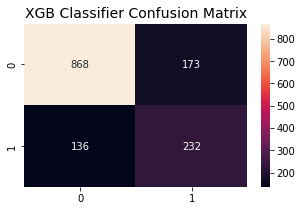

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("XGB Classifier Confusion Matrix",fontsize=14)
plt.show()

###LightGBM

In [ ]:
import lightgbm as lgbm
lightgbm = lgbm.LGBMClassifier(objective="binary", n_estimators=200, random_state=42)
lightgbm.fit(X_train_smt,y_train_smt)
y_pred = lightgbm.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LGBM = accuracy_score(y_test, y_pred)
print("The Accuracy for XGB is {}".format(LGBM))

[[881 160]
 [159 209]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1041
           1       0.57      0.57      0.57       368

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409

The Accuracy for XGB is 0.7735982966643009


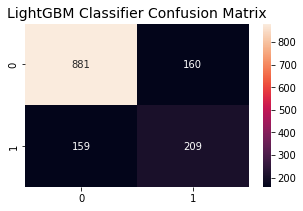

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("LightGBM Classifier Confusion Matrix",fontsize=14)
plt.show()

###AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
  DecisionTreeClassifier(max_depth=2), n_estimators=200,
  algorithm="SAMME.R", learning_rate=0.5)
ada.fit(X_train_smt,y_train_smt)
y_pred = ada.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
ADA = accuracy_score(y_test, y_pred)
print("The Accuracy for ADA is {}".format(ADA))

[[879 162]
 [163 205]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1041
           1       0.56      0.56      0.56       368

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

The Accuracy for ADA is 0.7693399574166075


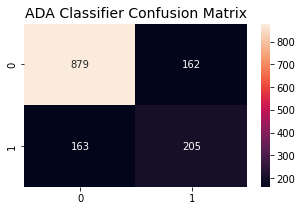

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("ADA Classifier Confusion Matrix",fontsize=14)
plt.show()

###VotingClassifier

In [ ]:
df_pred = pd.DataFrame(data = np.c_[LRA, DCT,BAGGING,RBF_SVC,RDF, XGB,LGBM,ADA],
                       columns = ['logistic', 'tree', 'bagging','SVM','rf','xgb', 'lgbm', 'ada'])

In [ ]:
df_pred.head()

,logistic,tree,bagging,SVM,rf,xgb,lgbm,ada
0,0.745209,0.730305,0.739532,0.735983,0.771469,0.780696,0.773598,0.76934


Với VotingClassifier chúng ta không nên chọn tất cả toàn bộ những mô hình đã huấn luyện trước đó. Màchỉ chọn những mô hình có khả năng học kém và một mô hình tốt nhất để huấn luyện nhằm phát huy tốt hiệu suất của mô hình này(Phương pháp này gọi là Non-Correlation của VotingClassifier)

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('tree', tree),('bagging', bagging),('svm', rbf_svc),('xgb', xgb)], voting='hard')
vote.fit(X_train,y_train)
y_pred = vote.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
VOTE = accuracy_score(y_test, y_pred)
print("The Accuracy for VotingClassifier is {}".format(VOTE))

[[958  83]
 [219 149]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1041
           1       0.64      0.40      0.50       368

    accuracy                           0.79      1409
   macro avg       0.73      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409

The Accuracy for VotingClassifier is 0.7856635911994322


Mô hình đã được cải thiện 0.5% so với mô hình tốt nhất `XGBoost`

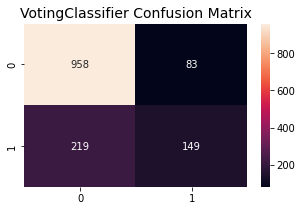

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("VotingClassifier Confusion Matrix",fontsize=14)
plt.show()

###Model selection

,Model,Accuracy_score
8,VOTE,0.785664
5,XGB,0.780696
6,LGBM,0.773598
4,RF,0.771469
7,ADA,0.769340
0,Logistic Regression,0.745209
2,BAGGING,0.739532
3,SVM,0.735983
1,Decision Tree,0.730305


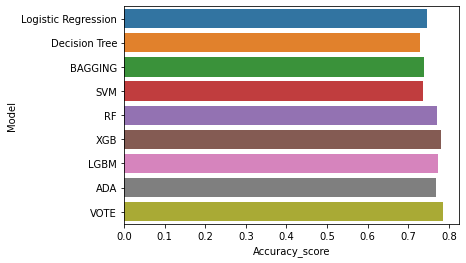

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'BAGGING', 'SVM','RF', 'XGB', 'LGBM', 'ADA','VOTE'],
    'Accuracy_score' :[LRA, DCT,BAGGING,RBF_SVC,RDF, XGB,LGBM,ADA,VOTE]
})

models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Như vậy, mô hình VotingClassifier cho tỷ lệ dự đoán chính xác cao nhất 78.56%. Tuy nhiên để tuning hyperparameters nhằm cải thiện thêm độ chính xác cho mô hình chúng ta có thể tiến hành cho các mô hình khác như LightGBM và RF

##OPTUNA

###Light GBM

In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 5.5 MB/s 
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 210 kB 65.0 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 113 kB 73.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 150 kB 66.0 MB/s 


In [ ]:
import optuna  # pip install optuna
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

def objective(trial, X_train, y_train):
    max_depth=trial.suggest_int('max_depth',2,14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #"n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgbm.LGBMClassifier(objective="binary", **param_grid)
    model.fit(X_train_smt, y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,scoring='accuracy',cv=cv, n_jobs=-1)
    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='maximize')
func = lambda trial: objective(trial, X_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

[I 2022-03-19 04:36:09,327] A new study created in memory with name: no-name-f2afe7e7-fc6d-4258-8fbb-ab069b80bd4b
[I 2022-03-19 04:36:12,813] Trial 0 finished with value: 0.7917971135987407 and parameters: {'max_depth': 8, 'learning_rate': 0.01774769517430945, 'num_leaves': 59, 'min_data_in_leaf': 124, 'max_bin': 277, 'lambda_l1': 20, 'lambda_l2': 15, 'min_gain_to_split': 11.370668690333035, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.7917971135987407.
[I 2022-03-19 04:36:13,728] Trial 1 finished with value: 0.778247969504715 and parameters: {'max_depth': 6, 'learning_rate': 0.08843894107284656, 'num_leaves': 23, 'min_data_in_leaf': 334, 'max_bin': 133, 'lambda_l1': 65, 'lambda_l2': 60, 'min_gain_to_split': 5.1011575764025325, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 0.7917971135987407.
[I 2022-03-19 04:36:14,266] Trial 2 finished with value: 0.7849016591430626 and parameter

In [ ]:
#trial = study.best_trial
#print('Accuracy: {}'.format(trial.value))
#print("Best hyperparameters: {}".format(trial.params))

print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (Accuracy): 0.84684
	Best params:
		max_depth: 2
		learning_rate: 0.28191648295927374
		num_leaves: 4
		min_data_in_leaf: 9
		max_bin: 134
		lambda_l1: 5
		lambda_l2: 5
		min_gain_to_split: 0.003582152195516497
		bagging_fraction: 0.4
		bagging_freq: 1
		feature_fraction: 0.6000000000000001


Độ chính xác của mô hình đã cải thiện đáng kể lên 84.68%. Chúng ta sẽ huấn luyện lại mô hình với những siêu tham số đã tìm được

In [ ]:
import lightgbm as lgbm

param = {'max_depth':2,
		'learning_rate':0.28191648295927374,
		'num_leaves':4,
		'min_data_in_leaf':9,
		'max_bin':134,
		'lambda_l1':5,
		'lambda_l2':5,
		'min_gain_to_split':0.003582152195516497,
		'bagging_fraction':0.4,
		'bagging_freq':1,
		'feature_fraction':0.6}

lightgbm = lgbm.LGBMClassifier(**param)
lightgbm.fit(X_train_smt,y_train_smt)
y_pred = lightgbm.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LGBM_optuna = accuracy_score(y_test, y_pred)
print("The Accuracy for XGB is {}".format(LGBM_optuna))

[[864 177]
 [118 250]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1041
           1       0.59      0.68      0.63       368

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.80      1409

The Accuracy for XGB is 0.7906316536550745


###Random Forest

In [ ]:
import optuna  # pip install optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
def objective(trial):
    param_grid = {
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            'n_estimators': trial.suggest_int("n_estimators", 10, 500),
            'max_depth': trial.suggest_int("max_depth", 1,100),
            'min_samples_split': trial.suggest_int("min_samples_split", 2,50),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,10),
            'random_state': 42,
            'verbose' : 0
        }
    model = RandomForestClassifier(**param_grid)
    model.fit(X_train_smt, y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,scoring='accuracy',cv=5, n_jobs=-1)
    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-03-19 04:39:54,688] A new study created in memory with name: no-name-2d3f4a5f-b90d-4c1a-8010-a375f33720be
[I 2022-03-19 04:40:11,166] Trial 0 finished with value: 0.8272489797232103 and parameters: {'criterion': 'entropy', 'n_estimators': 327, 'max_depth': 70, 'min_samples_split': 28, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8272489797232103.
[I 2022-03-19 04:40:15,184] Trial 1 finished with value: 0.8225302132870432 and parameters: {'criterion': 'gini', 'n_estimators': 117, 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8272489797232103.
[I 2022-03-19 04:40:43,870] Trial 2 finished with value: 0.8224091480003015 and parameters: {'criterion': 'gini', 'n_estimators': 440, 'max_depth': 63, 'min_samples_split': 31, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8272489797232103.
[I 2022-03-19 04:41:04,811] Trial 3 finished with value: 0.8250708286790862 and parameters: {'criterion': 'gini', 'n_estimators': 251, 'm

In [ ]:
print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (Accuracy): 0.85907
	Best params:
		criterion: entropy
		n_estimators: 272
		max_depth: 45
		min_samples_split: 2
		min_samples_leaf: 1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_rf = {'criterion': 'entropy',
		'n_estimators': 272,
		'max_depth': 45,
		'min_samples_split': 2,
		'min_samples_leaf': 1}
rf = RandomForestClassifier(**param_rf)
rf.fit(X_train_smt,y_train_smt)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RDF_optuna = accuracy_score(y_test, y_pred)
print("The Accuracy for RandomForest is {}".format(RDF_optuna))

[[864 177]
 [150 218]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.55      0.59      0.57       368

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409

The Accuracy for RandomForest is 0.7679205110007097


##GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
              'min_samples_leaf': [1, 2, 4],
              'n_estimators':[10, 25, 50, 75, 100,200]}

grid_search = GridSearchCV(model,param_grid,scoring = "accuracy",n_jobs = -1,cv = 5)
grid_result = grid_search.fit(X_train_smt, y_train_smt)
RDF2 = grid_result.best_score_
print("Best Score: %f using %s" % (RDF2, grid_result.best_params_))
print('Improvement of {:0.2f}%.'.format( 100 * (RDF2 - RDF) / RDF))

Best Score: 0.859311 using {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Improvement of 11.39%.


In [ ]:
final = RandomForestClassifier(n_estimators= 100, min_samples_leaf= 1,max_depth= 20)
final.fit(X_train_smt, y_train_smt)
y_pred = final.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RDF_grid = accuracy_score(y_test, y_pred)
print("The Accuracy for RandomForest is {}".format(RDF_grid))


[[859 182]
 [146 222]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.55      0.60      0.58       368

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.78      0.77      0.77      1409

The Accuracy for RandomForest is 0.7672107877927609


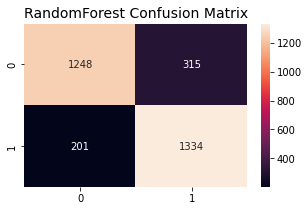

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()

##RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 25, 50, 75, 100,200]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 20, 30, 40, 50, 60, 70, None]
min_samples_split = [2, 5, 7, 10]
min_samples_leaf = [2, 4,6,8]


random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['gini','entropy']}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring = "accuracy", n_iter=100,cv=5,random_state=42,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_smt, y_train_smt)
RDF3 = grid_result.best_score_
print("Best Score: %f using %s" % (RDF3, grid_result.best_params_))
print('Improvement of {:0.2f}%.'.format( 100 * (RDF3 - RDF) / RDF))

Best Score: 0.859311 using {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Improvement of 11.39%.


In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 75}

In [ ]:
final = RandomForestClassifier(criterion ='entropy', max_depth=70, max_features = 'auto',
                               min_samples_leaf= 2,min_samples_split=2,n_estimators=75)
final.fit(X_train_smt, y_train_smt)
y_pred = final.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RDF_random = accuracy_score(y_test, y_pred)
print("The Accuracy for RandomForest is {}".format(RDF_random))

[[851 190]
 [139 229]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1041
           1       0.55      0.62      0.58       368

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

The Accuracy for RandomForest is 0.7665010645848119


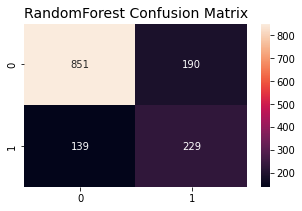

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()

,Model,Accuracy_score
0,LGBM Optuna,0.790632
4,VOTE,0.785664
1,RF Optuna,0.767921
2,RDF_grid,0.767211
3,RDF_random,0.766501


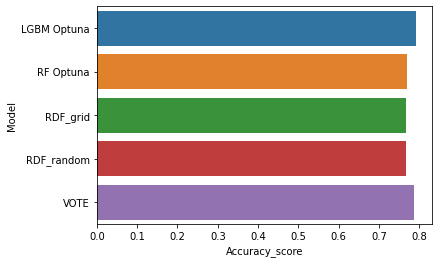

In [ ]:
models = pd.DataFrame({
    'Model':['LGBM Optuna', 'RF Optuna', 'RDF_grid', 'RDF_random','VOTE'],
    'Accuracy_score' :[LGBM_optuna, RDF_optuna,RDF_grid,RDF_random,VOTE]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)


* Với bài toán Customer Churn, chúng ta nên chú trọng vào việc giảm số lượng sai lầm loại I (FP) mà mô hình phán đoán được. Những khách hàng thuộc sai lầm loại I về thực tế họ đã rời bỏ và ngưng sử dụng các sản phẩm, dịch vụ của công ty để chuyển sang sử dụng sản phẩm, dịch vụ của công ty khác nhưng mô hình dự đoán những khách hàng này chưa rời bỏ (VD: Khách hàng của Viettel đã chuyển sang đăng ký các gói viễn thông khác như Vinaphone, Mobiphone nhưng mô hình dự đoán họ vẫn đang sử dụng dịch vụ của Viettel). Điều dẫn đến một sự lãng phí lớn cho công ty khi chúng ta tung ra các chương trình khuyến mại, ưu đãi dành riêng cho những đối tượng KH này nhằm mục đích giữ chân họ.
* Nên ngoài việc lựa chọn mô hình tốt, chúng ta cũng cần lựa chọn những mô hình có các TH thuộc sai lầm loại I là thấp nhất.
* Dựa vào độ chính xác và confusion matrix của các mô hình đã sử dụng ở trên thì những hyperparameter của mô hình LightGBM của kết quả Optuna đáp ứng hai yêu cầu trên, nên chúng ta sẽ chọn mô hình này làm mô hình cuối cùng để áp dụng vào bài toán Customer Churn.

#Pipeline

In [ ]:
df_pipeline.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((5634, 26), (1409, 26))

In [ ]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [ ]:
# Pipeline xử lý cho biến phân loại
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [ ]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

Class `ColumnTransformer` trong sklearn là một phương pháp biến đổi được áp dụng trên các cột. Chúng ta có thể gộp chung hai biến đổi trên biến liên tục và phân loại như sau thông qua class này như sau:

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

In [ ]:
# Completed training pipeline
from sklearn.ensemble import RandomForestClassifier

completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", RandomForestClassifier())
    ]
)

# training
completed_pl.fit(X_train, y_train)

# accuracy
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.78


Như vậy chúng ta đã hoàn thiện một Pipeline đơn giản cho mô hình . Mô hình có độ chính xác trên tập train là 100% và trên tập test là 77% cho thấy có hiện tượng overfitting. Để khắc phục overfitting chúng ta có thể thực hiện cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Đánh giá mô hình
scores = cross_val_score(completed_pl, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.545 0.035


In [ ]:
# list các mô hình được lựa chọn
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), lgbm.LGBMClassifier()]

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
  all_scores.append(scores)

Text(0.5, 1.0, 'Scores Metrics')

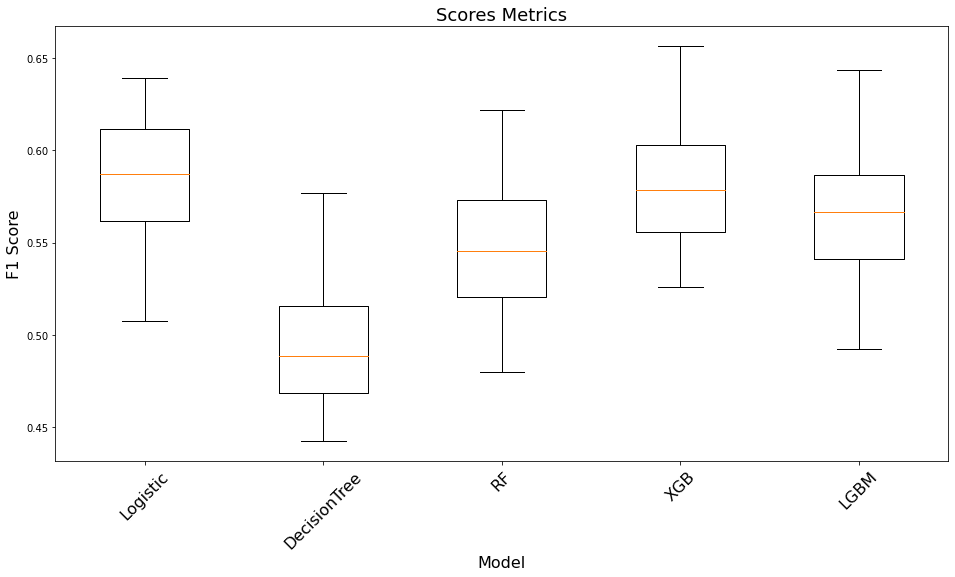

In [ ]:
import matplotlib.pyplot as plt
model_names = ['Logistic', 'DecisionTree', 'RF', 'XGB', 'LGBM']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

* Nhìn vào biểu đồ ta có thể thấy `Logistic` là thuật toán có độ chính xác cao nhất khi F1 score có độ giao động thấp và điểm F1 Score tốt nhất nên chúng ta sẽ lựa chọn lớp mô hình này để phát triển thành production.
* Xây dựng pipeline là một kỹ thuật quan trọng trong quá trình huấn luyện và đánh giá các mô hình machine learning. Nhờ kỹ thuật này chúng ta có thể tự động hoá quá trình phức tạp thành một hệ thống pipeline đơn giản mà có thể trực tiếp dự báo dựa trên dữ liệu thô.